In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")


path = r'D:\Miami MSBA\Spring\Term2\Big Data Analyst\Projects'

In [0]:
df = pd.read_csv(path + '\coffee-Full.csv')

# remove frist 2 column becasue it is useless
df = df.iloc[:,2:]
print(df.shape)
df.head()

(1805204, 12)


,age,income,sex,rewards_member,occupation,num_items,purchase_method,wait_time,purchase_amount,store_location,transaction_time,day_of_week
0,48,$50K-$75K,Female,False,Retired,3,Credit Card,4.370418,15.19,Uptown,22,Saturday
1,32,$25K-$50K,Female,False,Retired,3,Cash,2.307961,12.41,Midtown,20,Friday
2,68,$75K-$100K,Female,False,Self Employed,4,Mobile Payment,3.899398,18.16,Midtown,12,Friday
3,31,$25K-$50K,Female,False,Employed,4,Mobile Payment,1.871908,15.41,Downtown,14,Sunday
4,20,Under $25K,Female,False,Student,1,Credit Card,2.666482,6.23,Uptown,18,Wednesday


In [0]:
df.describe()

,age,num_items,wait_time,purchase_amount,transaction_time
count,1.805204e+06,1.805204e+06,1.805204e+06,1.805204e+06,1.805204e+06
mean,4.899022e+01,3.420186e+00,3.353913e+00,1.716922e+01,1.450415e+01
std,1.819399e+01,1.889844e+00,1.766741e+00,8.525740e+00,5.186799e+00
min,1.800000e+01,1.000000e+00,0.000000e+00,9.900000e-01,6.000000e+00
25%,3.300000e+01,2.000000e+00,1.886540e+00,1.101000e+01,1.000000e+01
50%,4.900000e+01,3.000000e+00,3.095139e+00,1.599000e+01,1.500000e+01
75%,6.500000e+01,5.000000e+00,4.581806e+00,2.193000e+01,1.900000e+01
max,8.000000e+01,1.400000e+01,1.407183e+01,9.174000e+01,2.300000e+01


In [0]:
pd.DataFrame(df.isnull().sum()).T

,age,income,sex,rewards_member,occupation,num_items,purchase_method,wait_time,purchase_amount,store_location,transaction_time,day_of_week
0,0,0,0,0,0,0,0,0,0,0,0,0


# data explore and analysis

<AxesSubplot: >

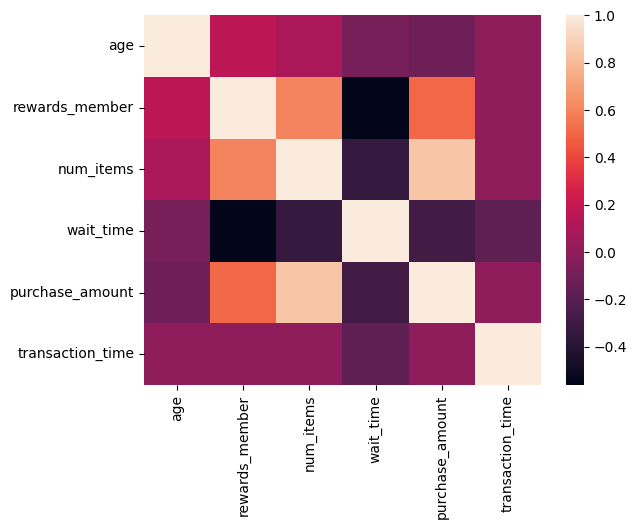

In [0]:
# correlation plot
sns.heatmap(df.corr())

<AxesSubplot: >

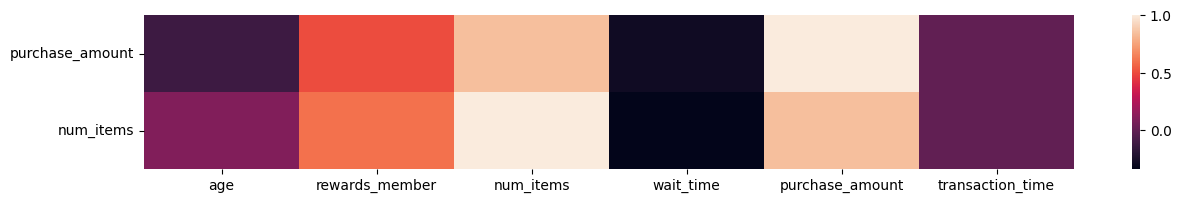

In [0]:
plt.figure(figsize=(15, 2))
sns.heatmap(df.corr()[['purchase_amount','num_items']].T)

In [0]:
df.groupby('income').mean().reset_index()

,income,age,rewards_member,num_items,wait_time,purchase_amount,transaction_time
0,$25K-$50K,28.234154,0.228015,3.168215,3.575186,19.408446,14.504581
1,$50K-$75K,45.000002,0.281038,3.293213,3.461474,15.526005,14.508695
2,$75K-$100K,61.744236,0.430041,3.651236,3.153071,16.780391,14.501614
3,Over $100K,75.242714,0.429774,3.650353,3.156258,16.769928,14.503793
4,Under $25K,18.797900,0.350508,3.451675,3.320723,17.801344,14.488857


<AxesSubplot: xlabel='day_of_week', ylabel='num_items'>

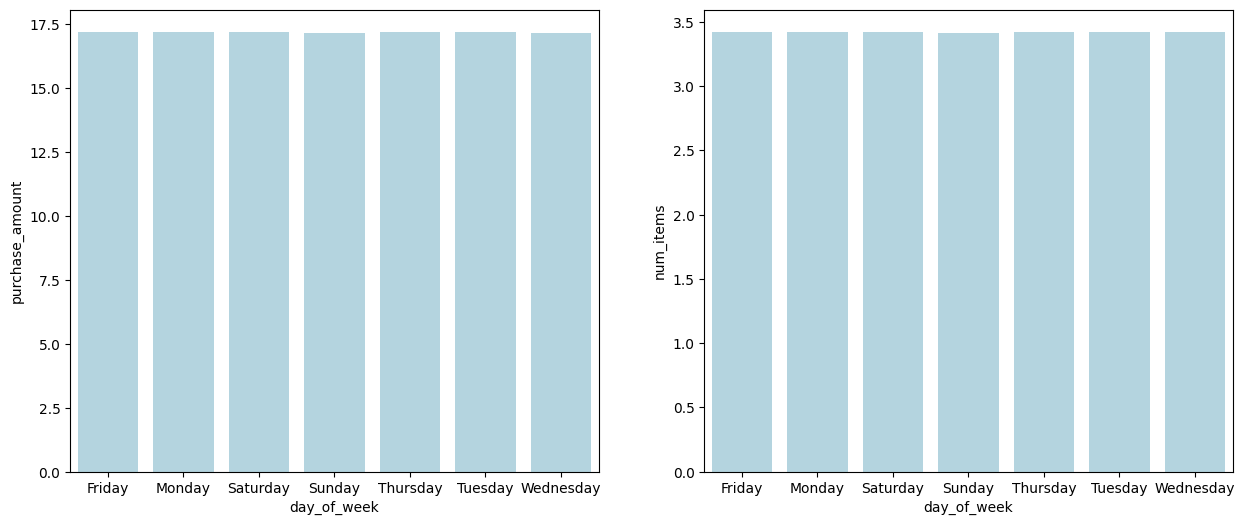

In [0]:
plt.figure(figsize=(15, 6))


plt.subplot(1,2,1)
sns.barplot(x = 'day_of_week',
            y = 'purchase_amount',
            data = df.groupby('day_of_week').mean().reset_index(),
            color='lightblue')
plt.subplot(1,2,2)
sns.barplot(x = 'day_of_week',
            y = 'num_items',
            data = df.groupby('day_of_week').mean().reset_index(),
            color='lightblue')



<AxesSubplot: xlabel='age', ylabel='num_items'>

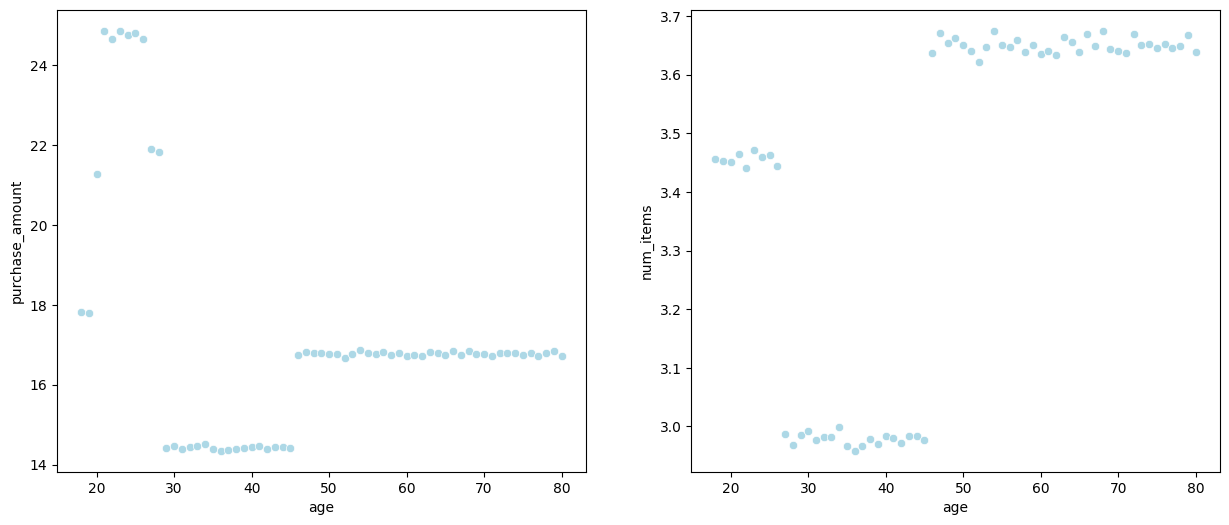

In [0]:
plt.figure(figsize=(15, 6))


plt.subplot(1,2,1)
sns.scatterplot(x = 'age',
            y = 'purchase_amount',
            data = df.groupby('age').mean().reset_index(),
            color='lightblue')
plt.subplot(1,2,2)
sns.scatterplot(x = 'age',
            y = 'num_items',
            data = df.groupby('age').mean().reset_index(),
            color='lightblue')

<AxesSubplot: xlabel='transaction_time', ylabel='purchase_method'>

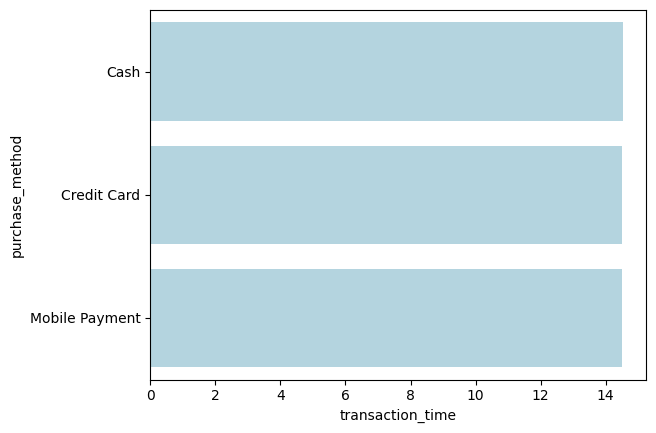

In [0]:
sns.barplot(x = 'transaction_time',
            y = 'purchase_method',
            data = df.groupby('purchase_method').mean().reset_index(),
            color='lightblue')

In [0]:
df.head()

,age,income,sex,rewards_member,occupation,num_items,purchase_method,wait_time,purchase_amount,store_location,transaction_time,day_of_week
0,48,$50K-$75K,Female,False,Retired,3,Credit Card,4.370418,15.19,Uptown,22,Saturday
1,32,$25K-$50K,Female,False,Retired,3,Cash,2.307961,12.41,Midtown,20,Friday
2,68,$75K-$100K,Female,False,Self Employed,4,Mobile Payment,3.899398,18.16,Midtown,12,Friday
3,31,$25K-$50K,Female,False,Employed,4,Mobile Payment,1.871908,15.41,Downtown,14,Sunday
4,20,Under $25K,Female,False,Student,1,Credit Card,2.666482,6.23,Uptown,18,Wednesday


# Data cleaning and ready for modeling

In [0]:
'''
change income to numeric
'''
# Dictionary for mapping the old values to the new ones
replacement_map = {
    '$50K-$75K': 1,
    '$25K-$50K': 2,
    '$75K-$100K': 3,
    'Under $25K': 4,
    'Over $100K': 5
}
# Replace the values in the 'income' column
df['income_number'] = df['income'].replace(replacement_map)

'''
change sex to numeric
'''
# Dictionary for mapping the old values to the new ones
replacement_map = {
    'Female' : 0,
    'Male' : 1
}
# Replace the values in the 'income' column
df['sex_number'] = df['sex'].replace(replacement_map)

'''
change rewards_member to numeric
'''
# Dictionary for mapping the old values to the new ones
replacement_map = {
    False : 0,
    True : 1
}
# Replace the values in the 'income' column
df['rewards_member_number'] = df['rewards_member'].replace(replacement_map)

'''
drop columns
'''
df = df.drop(columns=['sex', 'rewards_member', 'income'])


df.head()

,age,occupation,num_items,purchase_method,wait_time,purchase_amount,store_location,transaction_time,day_of_week,income_number,sex_number,rewards_member_number
0,48,Retired,3,Credit Card,4.370418,15.19,Uptown,22,Saturday,1,0,0
1,32,Retired,3,Cash,2.307961,12.41,Midtown,20,Friday,2,0,0
2,68,Self Employed,4,Mobile Payment,3.899398,18.16,Midtown,12,Friday,3,0,0
3,31,Employed,4,Mobile Payment,1.871908,15.41,Downtown,14,Sunday,2,0,0
4,20,Student,1,Credit Card,2.666482,6.23,Uptown,18,Wednesday,4,0,0


In [0]:

# Create dummy variables for the specified columns
purchase_method_dummies = pd.get_dummies(df['purchase_method'], prefix='purchase_method')
occupation_dummies = pd.get_dummies(df['occupation'], prefix='occupation')
store_location_dummies = pd.get_dummies(df['store_location'], prefix='store_location')
day_of_week_dummies = pd.get_dummies(df['day_of_week'], prefix='day_of_week')

# Concatenate the dummy variables back to the original DataFrame
df = pd.concat([df, purchase_method_dummies, occupation_dummies, store_location_dummies, day_of_week_dummies], axis=1)

# Drop the original columns
df = df.drop(columns=['purchase_method', 'occupation', 'store_location', 'day_of_week'])

df.head()

,age,num_items,wait_time,purchase_amount,transaction_time,income_number,sex_number,rewards_member_number,purchase_method_Cash,purchase_method_Credit Card,...,store_location_Downtown,store_location_Midtown,store_location_Uptown,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
0,48,3,4.370418,15.19,22,1,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
1,32,3,2.307961,12.41,20,2,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0
2,68,4,3.899398,18.16,12,3,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
3,31,4,1.871908,15.41,14,2,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
4,20,1,2.666482,6.23,18,4,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1


In [0]:
df.head().T

,0,1,2,3,4
age,48.000000,32.000000,68.000000,31.000000,20.000000
num_items,3.000000,3.000000,4.000000,4.000000,1.000000
wait_time,4.370418,2.307961,3.899398,1.871908,2.666482
purchase_amount,15.190000,12.410000,18.160000,15.410000,6.230000
transaction_time,22.000000,20.000000,12.000000,14.000000,18.000000
income_number,1.000000,2.000000,3.000000,2.000000,4.000000
sex_number,0.000000,0.000000,0.000000,0.000000,0.000000
rewards_member_number,0.000000,0.000000,0.000000,0.000000,0.000000
purchase_method_Cash,0.000000,1.000000,0.000000,0.000000,0.000000
purchase_method_Credit Card,1.000000,0.000000,0.000000,0.000000,1.000000


<AxesSubplot: >

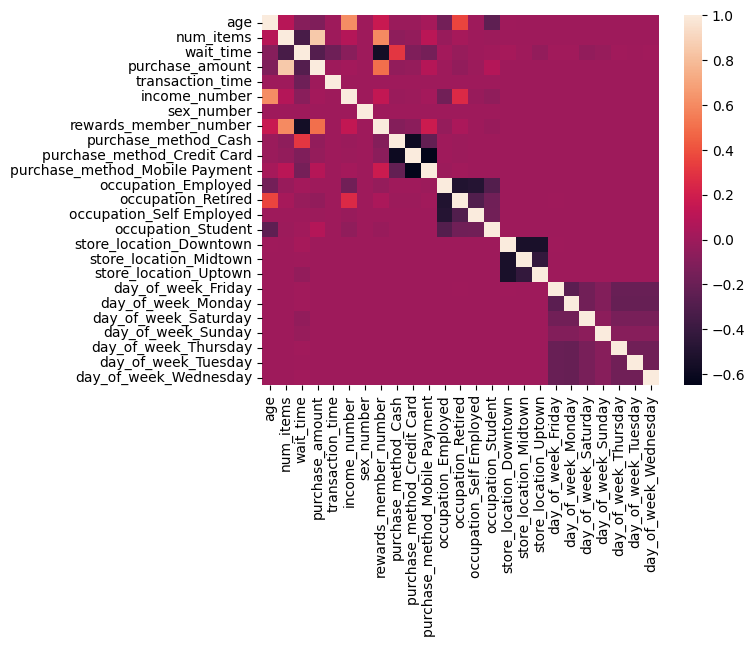

In [0]:
sns.heatmap(df.corr())

In [0]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1805204.0,48.990221,18.193989,18.00,33.00000,49.000000,65.000000,80.00000
num_items,1805204.0,3.420186,1.889844,1.00,2.00000,3.000000,5.000000,14.00000
wait_time,1805204.0,3.353913,1.766741,0.00,1.88654,3.095139,4.581806,14.07183
purchase_amount,1805204.0,17.169223,8.525740,0.99,11.01000,15.990000,21.930000,91.74000
transaction_time,1805204.0,14.504151,5.186799,6.00,10.00000,15.000000,19.000000,23.00000
income_number,1805204.0,2.572744,1.365351,1.00,1.00000,2.000000,3.000000,5.00000
sex_number,1805204.0,0.380205,0.485437,0.00,0.00000,0.000000,1.000000,1.00000
rewards_member_number,1805204.0,0.333778,0.471562,0.00,0.00000,0.000000,1.000000,1.00000
purchase_method_Cash,1805204.0,0.172871,0.378136,0.00,0.00000,0.000000,0.000000,1.00000
purchase_method_Credit Card,1805204.0,0.627253,0.483536,0.00,0.00000,1.000000,1.000000,1.00000


## Modeling

In [0]:
df.head()

,age,num_items,wait_time,purchase_amount,transaction_time,income_number,sex_number,rewards_member_number,purchase_method_Cash,purchase_method_Credit Card,...,store_location_Downtown,store_location_Midtown,store_location_Uptown,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
0,48,3,4.370418,15.19,22,1,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
1,32,3,2.307961,12.41,20,2,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0
2,68,4,3.899398,18.16,12,3,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
3,31,4,1.871908,15.41,14,2,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
4,20,1,2.666482,6.23,18,4,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1


In [0]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

# Split the dataset into training and testing sets
X = df.drop(columns = 'purchase_amount')
y = df['purchase_amount']
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)
# Define the hyperparameters to search
param_grid = {
    'fit_intercept': [True, False],
    'normalize': [True, False]
}

# Define the model
linear_regression = LinearRegression()

# Use GridSearchCV to find the optimal hyperparameters
grid_search = GridSearchCV(linear_regression,
                           param_grid, 
                           scoring='neg_mean_squared_error',
                           cv=5)

grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Train the model with the best hyperparameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Predict using the fitted model
y_pred = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Best hyperparameters: {'fit_intercept': False, 'normalize': True}
Mean Squared Error: 16.887283425478863


In [0]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

# Split the dataset into training and testing sets
X = df.drop(columns=['purchase_amount'])
y = df['purchase_amount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model with the specified hyperparameters
decision_tree = DecisionTreeRegressor(max_depth=8, min_samples_leaf=4, min_samples_split=2)

# Train the model
decision_tree.fit(X_train, y_train)

# Predict using the fitted model
y_pred = decision_tree.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Get feature importance
feature_importances = decision_tree.feature_importances_
print("Feature importances:", feature_importances)

# Associate feature importances with feature names
feature_importances_dict = dict(zip(X.columns, feature_importances))
print("Feature importances with names:", feature_importances_dict)

# Sort features by importance
sorted_features = sorted(feature_importances_dict.items(), key=lambda x: x[1], reverse=True)
print("Sorted features by importance:", sorted_features)

Mean Squared Error: 9.820888058540167
Feature importances: [1.37282705e-01 8.33379224e-01 7.54341931e-05 1.50896939e-05
 2.92115162e-02 1.40861675e-06 3.87362893e-07 1.75758004e-06
 2.21147190e-06 2.02685715e-06 1.41730926e-06 4.19112550e-06
 1.87609099e-06 1.16785007e-06 0.00000000e+00 1.79131941e-06
 2.66029114e-06 1.93751371e-06 2.96146952e-06 1.64728422e-06
 1.04765528e-06 2.28309278e-06 2.88140450e-06 2.37642190e-06]
Feature importances with names: {'age': 0.13728270469516213, 'num_items': 0.8333792244931042, 'wait_time': 7.543419313377111e-05, 'transaction_time': 1.5089693878024133e-05, 'income_number': 0.029211516207704444, 'sex_number': 1.4086167546293935e-06, 'rewards_member_number': 3.8736289339627034e-07, 'purchase_method_Cash': 1.7575800378605948e-06, 'purchase_method_Credit Card': 2.211471895462936e-06, 'purchase_method_Mobile Payment': 2.0268571548892353e-06, 'occupation_Employed': 1.4173092591585046e-06, 'occupation_Retired': 4.1911254983878966e-06, 'occupation_Self Empl

In [0]:
feature_importances

array([1.37282705e-01, 8.33379224e-01, 7.54341931e-05, 1.50896939e-05,
       2.92115162e-02, 1.40861675e-06, 3.87362893e-07, 1.75758004e-06,
       2.21147190e-06, 2.02685715e-06, 1.41730926e-06, 4.19112550e-06,
       1.87609099e-06, 1.16785007e-06, 0.00000000e+00, 1.79131941e-06,
       2.66029114e-06, 1.93751371e-06, 2.96146952e-06, 1.64728422e-06,
       1.04765528e-06, 2.28309278e-06, 2.88140450e-06, 2.37642190e-06])

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23],
 [Text(0, 0, 'age'),
  Text(1, 0, 'num_items'),
  Text(2, 0, 'wait_time'),
  Text(3, 0, 'transaction_time'),
  Text(4, 0, 'income_number'),
  Text(5, 0, 'sex_number'),
  Text(6, 0, 'rewards_member_number'),
  Text(7, 0, 'purchase_method_Cash'),
  Text(8, 0, 'purchase_method_Credit Card'),
  Text(9, 0, 'purchase_method_Mobile Payment'),
  Text(10, 0, 'occupation_Employed'),
  Text(11, 0, 'occupation_Retired'),
  Text(12, 0, 'occupation_Self Employed'),
  Text(13, 0, 'occupation_Student'),
  Text(14, 0, 'store_location_Downtown'),
  Text(15, 0, 'store_location_Midtown'),
  Text(16, 0, 'store_location_Uptown'),
  Text(17, 0, 'day_of_week_Friday'),
  Text(18, 0, 'day_of_week_Monday'),
  Text(19, 0, 'day_of_week_Saturday'),
  Text(20, 0, 'day_of_week_Sunday'),
  Text(21, 0, 'day_of_week_Thursday'),
  Text(22, 0, 'day_of_week_Tuesday'),
  Text(23, 0, 'day_of_

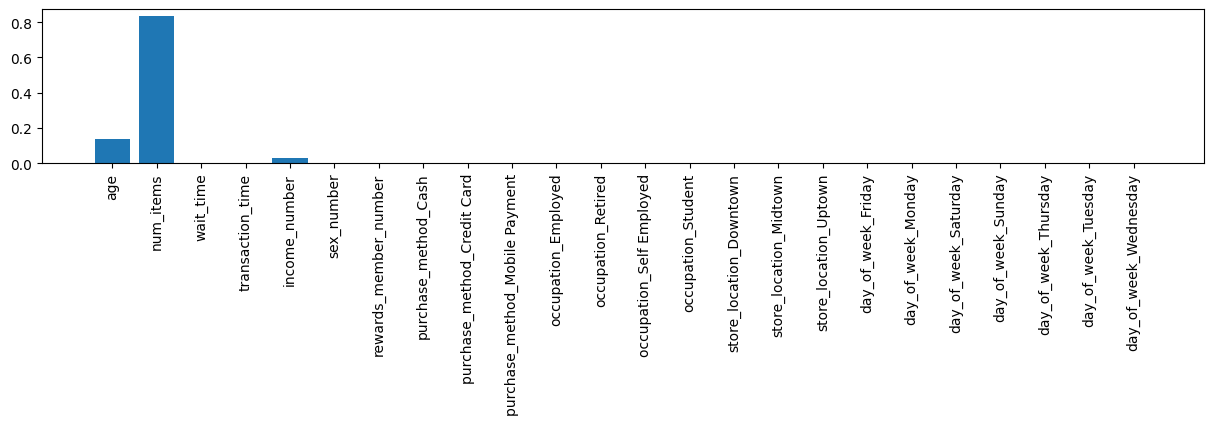

In [0]:
plt.figure(figsize=(15, 2))
plt.bar(df.drop(columns=['purchase_amount']).columns,
       feature_importances)
plt.xticks(rotation=90)